In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('creditcard.csv')
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [5]:
data.drop(['Time'], axis=1, inplace=True) 

In [6]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

In [7]:
X = data.drop('Class', axis=1)
y = data['Class']

In [8]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [9]:
print("\nAfter balancing, here's hte new class distribution:")
print(pd.Series(y_res).value_counts())


After balancing, here's hte new class distribution:
Class
0    284315
1    284315
Name: count, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
rf = LogisticRegression(max_iter=1000)
rf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
predictions = rf.predict(X_test)

In [12]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[55354  1396]
 [ 4580 52396]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [14]:
feature_importances = pd.Series(rf.coef_[0], index=X.columns)
feature_importances = feature_importances.abs()
feature_importances = feature_importances.sort_values(ascending=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_8836\2366402875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


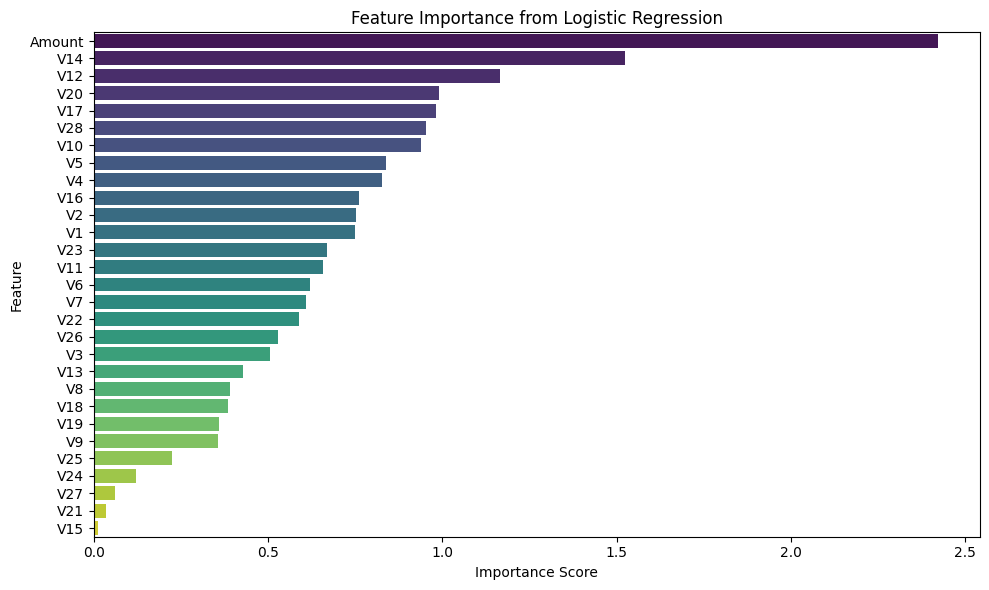

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance from Logistic Regression")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()